In [1]:
import pandas as pd
rawdf=pd.read_csv('healthcare_dataset.csv')
rawdf.sample(5)


Name  Age  Gender Blood Type Medical Condition  \
50145  tImotHY sTeVENS   59  Female         A-            Cancer   
32047   MARTHa ParRiSh   54  Female         B+          Diabetes   
22325  HEatheR edwArdS   52    Male        AB+          Diabetes   
43703  mADeline tayLOr   25  Female         O+      Hypertension   
14792       eRiN hiCks   43    Male        AB+            Asthma   

      Date of Admission             Doctor                        Hospital  \
50145        2023-06-02         Amy Clarke                       Clark LLC   
32047        2023-01-26       Janet Vargas                      Inc Arnold   
22325        2020-09-26  Jonathan Williams         and Cline Willis, Berry   
43703        2020-06-25      Michael Davis  Villanueva and Rivas Mitchell,   
14792        2023-03-27     Miguel Johnson         Brown Pierce, Reyes and   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
50145              Aetna    17158.358303          467      Emergency   
32047              Aetna    11186.049586          155         Urgent   
22325         Blue Cross    47416.631426          256       Elective   
43703         Blue Cross    16682.210920          116      Emergency   
14792              Cigna    18597.979829          436         Urgent   

      Discharge Date   Medication  Test Results  
50145     2023-06-10  Paracetamol        Normal  
32047     2023-02-13  Paracetamol      Abnormal  
22325     2020-10-20      Lipitor  Inconclusive  
43703     2020-07-15    Ibuprofen        Normal  
14792     2023-04-21   Penicillin  Inconclusive

In [2]:
rawdf.info()
rawdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

In [3]:
rawdf.describe()
std_from_mean=(rawdf.describe().loc['std']/rawdf.describe().loc['mean'])*100
print(rawdf.describe())
print(std_from_mean)

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000
Age               38.033875
Billing Amount    55.645399
Room Number       38.269591
dtype: float64


In [4]:
numeric_col=rawdf.select_dtypes(exclude='object').columns
print(numeric_col)
object_col=rawdf.select_dtypes(include='object').columns
print(object_col)
for i in object_col:
  print(f'{i} -- {rawdf[i].nunique()}')
  category_col=['Gender','Blood Type','Medical Condition','Insurance Provider','Admission Type','Medication','Test Results']
for i in category_col:
  print(f'{i} -- {rawdf[i].unique()}')
str_col=['Name','Doctor','Hospital']
for i in str_col:
  print(f'{i} -- {rawdf[i].nunique()}')
  dt_col=['Date of Admission','Discharge Date']
for i in dt_col:
  rawdf[i]=pd.to_datetime(rawdf[i])

Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')
Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')
Name -- 49992
Gender -- 2
Blood Type -- 8
Medical Condition -- 6
Date of Admission -- 1827
Doctor -- 40341
Hospital -- 39876
Insurance Provider -- 5
Admission Type -- 3
Discharge Date -- 1856
Medication -- 5
Test Results -- 3
Gender -- ['Male' 'Female']
Blood Type -- ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Medical Condition -- ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Insurance Provider -- ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Admission Type -- ['Urgent' 'Emergency' 'Elective']
Medication -- ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
Test Results -- ['Normal' 'Inconclusive' 'Abnormal']
Name -- 49992
Doctor -- 40341
Hospital -- 39

In [76]:
data=rawdf.copy()

In [6]:
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np


# Function to create interactive histogram with KDE using Plotly
def create_interactive_histogram_with_kde(data_column, bins, xlabel, title):
    # Calculate histogram
    counts, bin_edges = np.histogram(data_column, bins=bins, density=False)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Create KDE line
    kde = gaussian_kde(data_column)
    x_vals = np.linspace(min(data_column), max(data_column), 200)
    kde_vals = kde(x_vals)
    # Scale KDE to match histogram area
    kde_vals = kde_vals * (counts.sum() * bin_width)

    # Calculate mean and standard deviation
    mean_value = np.mean(data_column)
    std_dev = np.std(data_column)

    # Create figure
    fig = sp.make_subplots(rows=1, cols=1)

    # Add histogram bars
    hist_trace = go.Bar(x=bin_centers, y=counts, marker=dict(color='rgba(0, 123, 255, 0.7)'), name='Histogram')
    fig.add_trace(hist_trace)

    # Highlight the bar with the highest value
    max_height_idx = np.argmax(counts)
    highlight_trace = go.Bar(x=[bin_centers[max_height_idx]], y=[counts[max_height_idx]],
                             marker=dict(color='red'), name='Max Bar', showlegend=True)
    fig.add_trace(highlight_trace)

    # Add KDE line
    kde_trace = go.Scatter(x=x_vals, y=kde_vals, mode='lines', line=dict(color='blue', width=2), name='KDE')
    fig.add_trace(kde_trace)

    # Highlight the highest point in KDE
    max_kde_idx = np.argmax(kde_vals)
    max_kde_x = x_vals[max_kde_idx]
    max_kde_y = kde_vals[max_kde_idx]
    max_kde_trace = go.Scatter(x=[max_kde_x], y=[max_kde_y], mode='markers', marker=dict(color='green', size=10), name='Max KDE')
    fig.add_trace(max_kde_trace)

    # Add mean line
    mean_line = go.Scatter(x=[mean_value, mean_value], y=[0, max(counts)], mode='lines',
                           line=dict(color='black', width=3, dash='dot'), name='Mean')
    fig.add_trace(mean_line)

    # Add standard deviation lines
    std_dev_line_pos = go.Scatter(x=[mean_value + std_dev, mean_value + std_dev], y=[0, max(counts)],
                                  mode='lines', line=dict(color='yellow', width=3), name='Mean + 1 STD')
    std_dev_line_neg = go.Scatter(x=[mean_value - std_dev, mean_value - std_dev], y=[0, max(counts)],
                                  mode='lines', line=dict(color='yellow', width=3), name='Mean - 1 STD')
    fig.add_trace(std_dev_line_pos)
    fig.add_trace(std_dev_line_neg)

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title=xlabel,
        yaxis_title='Frequency',
        template='plotly_white',
        showlegend=True,
        yaxis=dict(tickformat=',')  # Disable scientific notation on y-axis
    )

    # Show figure
    fig.show()

# Interactive histogram for Age with KDE
create_interactive_histogram_with_kde(
    data['Age'],
    bins=30,
    xlabel='Age',
    title='Interactive Distribution of Age with Labels, Highlighted Max Bar, and KDE'
)

# Interactive histogram for Billing Amount with KDE
create_interactive_histogram_with_kde(
    data['Billing Amount'],
    bins=30,
    xlabel='Billing Amount',
    title='Interactive Distribution of Billing Amount with Labels, Highlighted Max Bar, and KDE'
)

# Interactive histogram for Room Number with KDE
create_interactive_histogram_with_kde(
    data['Room Number'],
    bins=30,
    xlabel='Room Number',
    title='Interactive Distribution of Room Number with Labels, Highlighted Max Bar, and KDE'
)

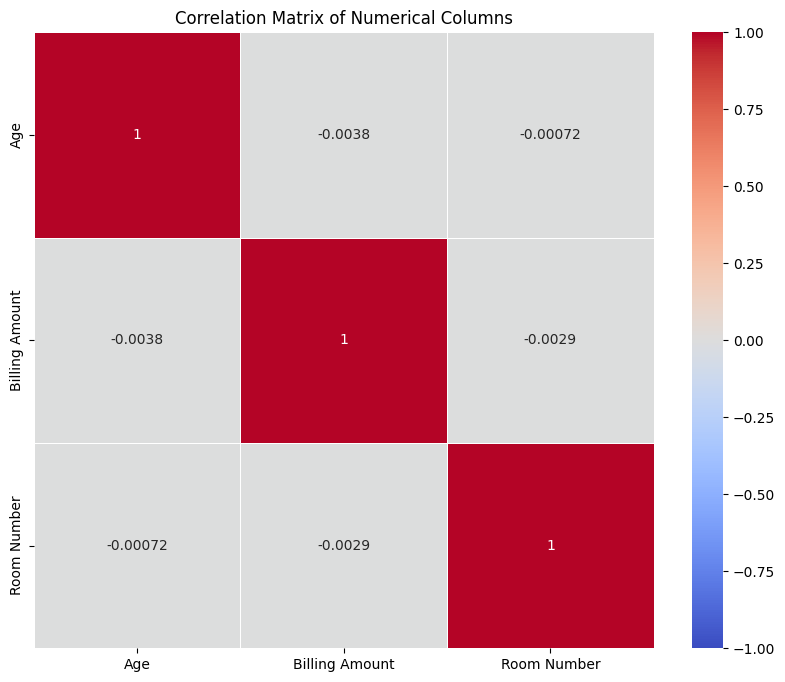

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix for numerical columns
correlation_matrix = data[['Age', 'Billing Amount', 'Room Number']].corr()

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [8]:

# Step 1: Plot interactive boxplots for each numerical column to identify potential outliers
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=['Age', 'Billing Amount', 'Room Number'])

# Interactive Boxplot for Age
age_box = go.Box(y=data['Age'], name='Age', marker=dict(color='blue'))
fig.add_trace(age_box, row=1, col=1)

# Interactive Boxplot for Billing Amount
billing_box = go.Box(y=data['Billing Amount'], name='Billing Amount', marker=dict(color='green'))
fig.add_trace(billing_box, row=1, col=2)

# Interactive Boxplot for Room Number
room_box = go.Box(y=data['Room Number'], name='Room Number', marker=dict(color='orange'))
fig.add_trace(room_box, row=1, col=3)

# Update layout for the boxplots
fig.update_layout(
    title='Interactive Boxplots of Numerical Columns',
    template='plotly_white',
    showlegend=False
)

# Show figure
fig.show()


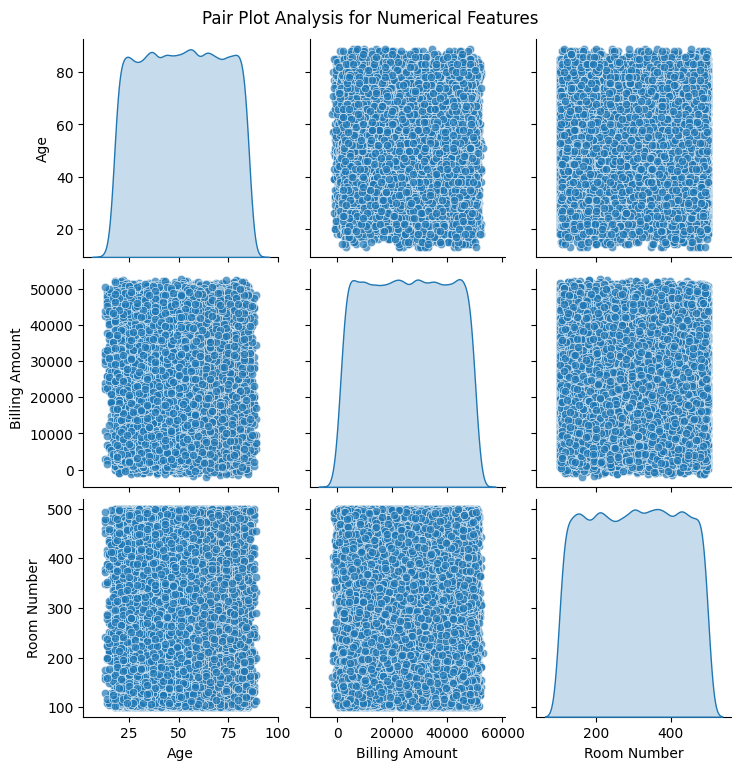

In [9]:
# Re-import necessary libraries and reload the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Perform pair plot analysis for numerical features
numerical_columns = ['Age', 'Billing Amount', 'Room Number']

# Creating pair plot
sns.pairplot(data[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot Analysis for Numerical Features', y=1.02)
plt.show()


In [9]:
import plotly.graph_objects as go


# Calculate number of unique values for each categorical column
unique_values = {col: data[col].nunique() for col in category_col}

# Create an interactive bar plot to visualize the number of unique values in categorical columns
unique_values_trace = go.Bar(
    x=list(unique_values.keys()),
    y=list(unique_values.values()),
    marker=dict(color='skyblue'),
    name='Unique Values'
)

fig = go.Figure(data=[unique_values_trace])
fig.update_layout(
    title='Number of Unique Values in Categorical Columns',
    xaxis_title='Categorical Columns',
    yaxis_title='Number of Unique Values',
    template='plotly_white',
    yaxis=dict(tickformat=',', type='log')  # Using logarithmic scale for better visualization of small values
)

# Show figure
fig.show()

In [10]:
import plotly.graph_objects as go


# Calculate number of unique values for each categorical column
unique_values = {col: data[col].nunique() for col in str_col}

# Create an interactive bar plot to visualize the number of unique values in categorical columns
unique_values_trace = go.Bar(
    x=list(unique_values.keys()),
    y=list(unique_values.values()),
    marker=dict(color='skyblue'),
    name='Unique Values'
)

fig = go.Figure(data=[unique_values_trace])
fig.update_layout(
    title='Number of Unique Values in Categorical Columns',
    xaxis_title='Categorical Columns',
    yaxis_title='Number of Unique Values',
    template='plotly_white',
    yaxis=dict(tickformat=',', type='log')  # Using logarithmic scale for better visualization of small values
)

# Show figure
fig.show()

In [11]:
import plotly.graph_objects as go


# Calculate number of unique values for each categorical column
unique_values = {col: data[col].nunique() for col in dt_col}

# Create an interactive bar plot to visualize the number of unique values in categorical columns
unique_values_trace = go.Bar(
    x=list(unique_values.keys()),
    y=list(unique_values.values()),
    marker=dict(color='skyblue'),
    name='Unique Values'
)

fig = go.Figure(data=[unique_values_trace])
fig.update_layout(
    title='Number of Unique Values in Categorical Columns',
    xaxis_title='Categorical Columns',
    yaxis_title='Number of Unique Values',
    template='plotly_white',
    yaxis=dict(tickformat=',', type='log')  # Using logarithmic scale for better visualization of small values
)

# Show figure
fig.show()

In [13]:
import plotly.express as px

def plot_class(datas, cols):
    for col in cols:
        # Print the column name for debugging
        print(col)

        # Create a frequency table for the column
        frequency_data = datas[col].value_counts().reset_index()
        frequency_data.columns = [col, 'Frequency']

        # Create an interactive bar plot for the column with enhanced aesthetics
        fig = px.bar(frequency_data, x=col, y='Frequency', title=f'Frequency Distribution of {col}',
                     labels={col: col, 'Frequency': 'Frequency'}, template='plotly_white',
                     color=col, color_discrete_sequence=px.colors.qualitative.Set2)
        fig.update_layout(
            title={
                'text': f'Frequency Distribution of {col}',
                'y': 0.9,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'
            },
            xaxis=dict(title=col, title_font=dict(size=14)),
            yaxis=dict(title='Frequency', title_font=dict(size=14)),
            bargap=0.2
        )
        # Show the figure
        fig.show()

# Call the function with the data and list of columns
plot_class(data, category_col)


Gender


Blood Type


Medical Condition


Insurance Provider


Admission Type


Medication


Test Results


In [77]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

data['date_of_admission'] = pd.to_datetime(data['date_of_admission'], errors='coerce')
data['discharge_date'] = pd.to_datetime(data['discharge_date'], errors='coerce')
data['name'] = data['name'].str.title()
data['gender'] = data['gender'].str.capitalize()

# Check for rows with invalid date parsing or inconsistencies
invalid_dates = data[data['date_of_admission'].isnull() | data['discharge_date'].isnull()]
invalid_dates


Empty DataFrame
Columns: [name, age, gender, blood_type, medical_condition, date_of_admission, doctor, hospital, insurance_provider, billing_amount, room_number, admission_type, discharge_date, medication, test_results]
Index: []

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Define encoding functions
def encode_features(dataframe, cols):
    labelencoder = LabelEncoder()
    for column in cols:
        if dataframe[column].dtype == 'object':
            dataframe[column] = labelencoder.fit_transform(dataframe[column])
    return dataframe

def apply_one_hot_encoding(dataframe, cols):
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')

    # Fit and transform the specified columns
    encoded_data = encoder.fit_transform(dataframe[cols])

    # Create a DataFrame with the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols), index=dataframe.index)

    # Drop the original columns and concatenate the encoded DataFrame
    dataframe = dataframe.drop(columns=cols)
    dataframe = pd.concat([dataframe, encoded_df], axis=1)

    return dataframe

In [79]:
category_col=[col.lower().replace(' ', '_') for col in category_col]

In [73]:
del data

In [80]:
onehot_df=apply_one_hot_encoding(data,[col for col in category_col])

In [81]:
onehot_df.columns

Index(['name', 'age', 'date_of_admission', 'doctor', 'hospital',
       'billing_amount', 'room_number', 'discharge_date', 'gender_Female',
       'gender_Male', 'blood_type_A+', 'blood_type_A-', 'blood_type_AB+',
       'blood_type_AB-', 'blood_type_B+', 'blood_type_B-', 'blood_type_O+',
       'blood_type_O-', 'medical_condition_Arthritis',
       'medical_condition_Asthma', 'medical_condition_Cancer',
       'medical_condition_Diabetes', 'medical_condition_Hypertension',
       'medical_condition_Obesity', 'insurance_provider_Aetna',
       'insurance_provider_Blue Cross', 'insurance_provider_Cigna',
       'insurance_provider_Medicare', 'insurance_provider_UnitedHealthcare',
       'admission_type_Elective', 'admission_type_Emergency',
       'admission_type_Urgent', 'medication_Aspirin', 'medication_Ibuprofen',
       'medication_Lipitor', 'medication_Paracetamol', 'medication_Penicillin',
       'test_results_Abnormal', 'test_results_Inconclusive',
       'test_results_Normal'],


In [37]:
medication_columns = onehot_df.columns[onehot_df.columns.str.contains("medical_condition", case=False)]


In [82]:
medication_columns

Index(['medical_condition_Arthritis', 'medical_condition_Asthma',
       'medical_condition_Cancer', 'medical_condition_Diabetes',
       'medical_condition_Hypertension', 'medical_condition_Obesity'],
      dtype='object')

In [83]:
data

name  age  gender blood_type medical_condition  \
0          Bobby Jackson   30    Male         B-            Cancer   
1           Leslie Terry   62    Male         A+           Obesity   
2            Danny Smith   76  Female         A-           Obesity   
3           Andrew Watts   28  Female         O+          Diabetes   
4          Adrienne Bell   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  Elizabeth Jackson   42  Female         O+            Asthma   
55496         Kyle Perez   61  Female        AB-           Obesity   
55497       Heather Wang   38  Female         B+      Hypertension   
55498     Jennifer Jones   43    Male         O-         Arthritis   
55499       James Garcia   53  Female         O+         Arthritis   

      date_of_admission            doctor                      hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1            2019-08-20   Samantha Davies                       Kim Inc   
2            2022-09-22  Tiffany Mitchell                      Cook PLC   
3            2020-11-18       Kevin Wells    Hernandez Rogers and Vang,   
4            2022-09-19    Kathleen Hanna                   White-White   
...                 ...               ...                           ...   
55495        2020-08-16     Joshua Jarvis                Jones-Thompson   
55496        2020-01-23   Taylor Sullivan                  Tucker-Moyer   
55497        2020-07-13    Joe Jacobs DVM  and Mahoney Johnson Vasquez,   
55498        2019-05-25    Kimberly Curry      Jackson Todd and Castro,   
55499        2024-04-02     Dennis Warren                Henry Sons and   

      insurance_provider  billing_amount  room_number admission_type  \
0             Blue Cross    18856.281306          328         Urgent   
1               Medicare    33643.327287          265      Emergency   
2                  Aetna    27955.096079          205      Emergency   
3               Medicare    37909.782410          450       Elective   
4                  Aetna    14238.317814          458         Urgent   
...                  ...             ...          ...            ...   
55495         Blue Cross     2650.714952          417       Elective   
55496              Cigna    31457.797307          316       Elective   
55497   UnitedHealthcare    27620.764717          347         Urgent   
55498           Medicare    32451.092358          321       Elective   
55499              Aetna     4010.134172          448         Urgent   

      discharge_date   medication  test_results  
0         2024-02-02  Paracetamol        Normal  
1         2019-08-26    Ibuprofen  Inconclusive  
2         2022-10-07      Aspirin        Normal  
3         2020-12-18    Ibuprofen      Abnormal  
4         2022-10-09   Penicillin      Abnormal  
...              ...          ...           ...  
55495     2020-09-15   Penicillin      Abnormal  
55496     2020-02-01      Aspirin        Normal  
55497     2020-08-10    Ibuprofen      Abnormal  
55498     2019-05-31    Ibuprofen      Abnormal  
55499     2024-04-29    Ibuprofen      Abnormal  

[55500 rows x 15 columns]

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate

# Scaling the numerical features

def scale_numerical_features(data):

  # Initialize the scaler and fit_transform only on numerical features
  scaler = MinMaxScaler(feature_range=(0, 1))
  numerical_features = ['age', 'billing_amount', 'room_number']
  data[numerical_features] = scaler.fit_transform(data[numerical_features])
  return data

def split_data(data):
  # Split the data into training and testing sets
  X=data.drop(columns=['medical_condition_Arthritis', 'medical_condition_Asthma',
       'medical_condition_Cancer', 'medical_condition_Diabetes',
       'medical_condition_Hypertension', 'medical_condition_Obesity','date_of_admission','discharge_date','name','doctor','hospital'])
  y=data[['medical_condition_Arthritis', 'medical_condition_Asthma',
       'medical_condition_Cancer', 'medical_condition_Diabetes',
       'medical_condition_Hypertension', 'medical_condition_Obesity']]
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  X_train.shape,y_train.shape,X_test.shape,y_test.shape
  return X_train,X_test,y_train,y_test
  
def chi_square_test(X_train,y_train):
  # Perform the chi-square test 
  # Perform the chi-square test
# Perform the chi-square test
  chi2_selector = SelectKBest(score_func=chi2, k='all')
  chi2_selector.fit(X_train, y_train)

# Get the p-values and scores
  chi2_scores = pd.DataFrame({'Feature': X_train.columns,
                            'Chi2 Score': chi2_selector.scores_,
                            'P-Value': chi2_selector.pvalues_})
  # Display the chi-square scores and p-values
  print(chi2_scores)
  # Sort the scores by Chi2 score
  chi2_scores_sorted = chi2_scores.sort_values(by='Chi2 Score', ascending=False)
  chi2_results = []

  for target_col in ['medical_condition_Arthritis', 'medical_condition_Asthma',
       'medical_condition_Cancer', 'medical_condition_Diabetes',
       'medical_condition_Hypertension', 'medical_condition_Obesity']:
    # Perform chi-square test using the current target column
      y_current_target = y_train[target_col]
      chi2_selector = SelectKBest(score_func=chi2, k='all')
      chi2_selector.fit(X_train, y_current_target)

    # Store the scores and p-values for the current target column
      chi2_scores_current = pd.DataFrame({'Feature': X_train.columns,
                                        'Chi2 Score': chi2_selector.scores_,
                                        'P-Value': chi2_selector.pvalues_,
                                        'Target Column': target_col})
      chi2_results.append(chi2_scores_current)

# Concatenate all the results into a single DataFrame
  chi2_results_df = pd.concat(chi2_results)
  chi2_results_df
# Create a bar chart to visualize the chi-square scores for each feature, grouped by the target column
  fig = px.bar(
    chi2_results_df,
    x='Feature',
    y='P-Value',
    color='Target Column',
    title='Chi-Square Scores for Each Feature Across Different Target Columns',
    barmode='group',
    labels={'Chi2 Score': 'Chi-Square Score', 'Feature': 'Feature'},
    height=600
  )

# Update layout for better readability
  fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Features',
    yaxis_title='P-Value',
    legend_title='Target Column',
    margin=dict(l=50, r=50, t=50, b=150)
  )

# Display the interactive chart
  fig.show()

def feature_importance(X_train,y_train):
  # Assume X_train and y_train are already defined
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

# Get the feature importance scores
  importances = model.feature_importances_

# Create a DataFrame to display the importance of each feature
  feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
  }).sort_values(by='Importance', ascending=False)

# Display the feature importances
  print(feature_importance_df)

def rfe(X_train,y_train):
  # Initialize the RandomForestClassifier
  rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

  # Initialize RFE with the RandomForest model
  rfe = RFE(estimator=rf_model, n_features_to_select=10)  # Selecting top 10 features as an example

  # Fit RFE on the training data
  rfe.fit(X_train, y_train)

  # Get the rankings of the features and create a DataFrame
  rfe_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'RFE Ranking': rfe.ranking_
  }).sort_values(by='RFE Ranking')

  return rfe_ranking


def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, important_features=None):
    """
    Trains and evaluates the given model using the specified training and testing data.

    Parameters:
    - model: The model to train (e.g., RandomForestClassifier).
    - X_train: The training feature dataset.
    - y_train: The training labels.
    - X_test: The testing feature dataset.
    - y_test: The testing labels.
    - important_features: List of important features to use (default is None, use all features).

    Returns:
    - accuracy: Accuracy score of the model on the test set.
    - report: Classification report for the model's predictions.
    """
    # Use only the important features if provided
    if important_features is not None:
        X_train = X_train[important_features]
        X_test = X_test[important_features]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    #y_test_labels = y_test.idxmax(axis=1) #if isinstance(y_test, pd.DataFrame) else y_test
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    # Plot ROC curve for multi-class classification
    if isinstance(y_test, pd.DataFrame):
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
        y_pred_proba = model.predict_proba(X_test)
        n_classes = y_test_binarized.shape[1]

        plt.figure(figsize=(10, 7))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
        plt.legend(loc='lower right')
        plt.show()

    return accuracy, report
 
def train_multiple_classifiers(X_train, y_train, X_test, y_test,important_features):
    # List of models to train
    models = [
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("Logistic Regression", LogisticRegression(random_state=42)),
        ("K-Neighbors Classifier", KNeighborsClassifier()),
        ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
        ("Naive Bayes", GaussianNB())
    ]

    results = []
    metrics = []
    # Iterate over each model, train, and evaluate
    # Iterate over each model, train, and evaluate
    for model_name, model in models:
        print(f"\nTraining {model_name}...")

        # Convert multilabel y_train and y_test to multiclass by selecting the label with the maximum value
        if isinstance(y_train, pd.DataFrame) or isinstance(y_test, pd.DataFrame):
            y_train = y_train.idxmax(axis=1)
            y_test = y_test.idxmax(axis=1)

        accuracy, report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
        metrics.append((model_name, accuracy,report))
        results.append((model_name, accuracy))

        # Print the results
        #print(f"\nModel: {model_name}")
        #print(f"Accuracy: {accuracy:.2f}")

    # Display results in a tabular format
    results_table = [(model_name, accuracy) for model_name, accuracy in results]
    print(tabulate(metrics, headers=["Model", "Accuracy","classfication_report"], tablefmt="pretty", floatfmt=".4f"))



    return results

    



In [85]:
 # Preprocess the data
data = scale_numerical_features(onehot_df)



In [91]:
data.columns

Index(['name', 'age', 'date_of_admission', 'doctor', 'hospital',
       'billing_amount', 'room_number', 'discharge_date', 'gender_Female',
       'gender_Male', 'blood_type_A+', 'blood_type_A-', 'blood_type_AB+',
       'blood_type_AB-', 'blood_type_B+', 'blood_type_B-', 'blood_type_O+',
       'blood_type_O-', 'medical_condition_Arthritis',
       'medical_condition_Asthma', 'medical_condition_Cancer',
       'medical_condition_Diabetes', 'medical_condition_Hypertension',
       'medical_condition_Obesity', 'insurance_provider_Aetna',
       'insurance_provider_Blue Cross', 'insurance_provider_Cigna',
       'insurance_provider_Medicare', 'insurance_provider_UnitedHealthcare',
       'admission_type_Elective', 'admission_type_Emergency',
       'admission_type_Urgent', 'medication_Aspirin', 'medication_Ibuprofen',
       'medication_Lipitor', 'medication_Paracetamol', 'medication_Penicillin',
       'test_results_Abnormal', 'test_results_Inconclusive',
       'test_results_Normal'],


In [ ]:
data

In [93]:

X_train, X_test, y_train, y_test = split_data(data)

In [94]:

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((44400, 29), (44400, 6), (11100, 29), (11100, 6))

In [95]:
chi_square_test(X_train,y_train)


                                Feature  Chi2 Score   P-Value
0                                   age    0.844972  0.974077
1                        billing_amount    1.230709  0.941898
2                           room_number    0.509467  0.991773
3                         gender_Female    0.568388  0.989405
4                           gender_Male    0.566089  0.989503
5                         blood_type_A+    4.673398  0.457024
6                         blood_type_A-    1.682892  0.891048
7                        blood_type_AB+    8.210988  0.144985
8                        blood_type_AB-    0.765742  0.979167
9                         blood_type_B+    8.576265  0.127207
10                        blood_type_B-    3.077049  0.688108
11                        blood_type_O+    3.074144  0.688556
12                        blood_type_O-    1.307259  0.934183
13             insurance_provider_Aetna    3.037315  0.694233
14        insurance_provider_Blue Cross    2.854496  0.722406
15      

In [96]:
feature_importance(X_train,y_train)



                                Feature  Importance
1                        billing_amount    0.210682
2                           room_number    0.206446
0                                   age    0.188619
3                         gender_Female    0.017953
4                           gender_Male    0.017778
13             insurance_provider_Aetna    0.016789
27            test_results_Inconclusive    0.016592
14        insurance_provider_Blue Cross    0.016238
21                   medication_Aspirin    0.016178
25                medication_Penicillin    0.016175
22                 medication_Ibuprofen    0.015947
28                  test_results_Normal    0.015892
26                test_results_Abnormal    0.015828
15             insurance_provider_Cigna    0.015815
17  insurance_provider_UnitedHealthcare    0.015802
16          insurance_provider_Medicare    0.015651
19             admission_type_Emergency    0.015406
23                   medication_Lipitor    0.015215
18          

In [97]:
rfedt=rfe(X_train,y_train)

In [98]:
# Train and evaluate multiple classifiers
important_features= rfedt.where(rfedt['RFE Ranking']==1).dropna()

In [99]:
important_features

Feature  RFE Ranking
0                         age          1.0
1              billing_amount          1.0
2                 room_number          1.0
4                 gender_Male          1.0
13   insurance_provider_Aetna          1.0
8              blood_type_AB-          1.0
22       medication_Ibuprofen          1.0
19   admission_type_Emergency          1.0
25      medication_Penicillin          1.0
27  test_results_Inconclusive          1.0

In [100]:
train_multiple_classifiers(X_train, y_train, X_test, y_test,important_features.Feature.to_list())


Training Random Forest...

Training Decision Tree...

Training Logistic Regression...

Training K-Neighbors Classifier...

Training Gradient Boosting...

Training Naive Bayes...
+------------------------+---------------------+-------------------------------------------------------------------------+
|         Model          |      Accuracy       |                          classfication_report                           |
+------------------------+---------------------+-------------------------------------------------------------------------+
|     Random Forest      | 0.2954954954954955  |                 precision    recall  f1-score   support                 |
|                        |                     |                                                                         |
|                        |                     |    medical_condition_Arthritis       0.29      0.28      0.29      1915 |
|                        |                     |       medical_condition_Asthma    

[('Random Forest', 0.2954954954954955),
 ('Decision Tree', 0.2681081081081081),
 ('Logistic Regression', 0.17117117117117117),
 ('K-Neighbors Classifier', 0.20342342342342343),
 ('Gradient Boosting', 0.1728828828828829),
 ('Naive Bayes', 0.17117117117117117)]

In [101]:
onehot_df['length_of_stay'] = (onehot_df['discharge_date'] - onehot_df['date_of_admission']).dt.days

# Feature 2: Admission Year and Month
onehot_df['admission_year'] = onehot_df['date_of_admission'].dt.year
onehot_df['admission_month'] = onehot_df['date_of_admission'].dt.month

In [102]:
 # Preprocess the data
data = scale_numerical_features(onehot_df)
X_train, X_test, y_train, y_test = split_data(data)
X_train.shape,y_train.shape,X_test.shape,y_test.shape
chi_square_test(X_train,y_train)
feature_importance(X_train,y_train)
rfedt=rfe(X_train,y_train)
# Train and evaluate multiple classifiers
# Train and evaluate multiple classifiers
important_features= rfedt.where(rfedt['RFE Ranking']==1).dropna()

                                Feature  Chi2 Score       P-Value
0                                   age    0.844972  9.740766e-01
1                        billing_amount    1.230709  9.418975e-01
2                           room_number    0.509467  9.917726e-01
3                         gender_Female    0.568388  9.894048e-01
4                           gender_Male    0.566089  9.895032e-01
5                         blood_type_A+    4.673398  4.570237e-01
6                         blood_type_A-    1.682892  8.910480e-01
7                        blood_type_AB+    8.210988  1.449846e-01
8                        blood_type_AB-    0.765742  9.791668e-01
9                         blood_type_B+    8.576265  1.272067e-01
10                        blood_type_B-    3.077049  6.881083e-01
11                        blood_type_O+    3.074144  6.885559e-01
12                        blood_type_O-    1.307259  9.341830e-01
13             insurance_provider_Aetna    3.037315  6.942328e-01
14        

                                Feature  Importance
1                        billing_amount    0.127248
2                           room_number    0.124961
0                                   age    0.114785
29                       length_of_stay    0.103345
31                      admission_month    0.086093
30                       admission_year    0.065409
3                         gender_Female    0.017213
4                           gender_Male    0.016931
27            test_results_Inconclusive    0.016248
25                medication_Penicillin    0.015658
24               medication_Paracetamol    0.015464
26                test_results_Abnormal    0.015415
28                  test_results_Normal    0.015324
16          insurance_provider_Medicare    0.015259
14        insurance_provider_Blue Cross    0.015238
22                 medication_Ibuprofen    0.015187
19             admission_type_Emergency    0.015143
20                admission_type_Urgent    0.015121
21          

In [103]:
train_multiple_classifiers(X_train, y_train, X_test, y_test,important_features.Feature.to_list())


Training Random Forest...

Training Decision Tree...

Training Logistic Regression...


c:\workspace\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Training K-Neighbors Classifier...

Training Gradient Boosting...

Training Naive Bayes...
+------------------------+---------------------+-------------------------------------------------------------------------+
|         Model          |      Accuracy       |                          classfication_report                           |
+------------------------+---------------------+-------------------------------------------------------------------------+
|     Random Forest      | 0.29387387387387387 |                 precision    recall  f1-score   support                 |
|                        |                     |                                                                         |
|                        |                     |    medical_condition_Arthritis       0.28      0.30      0.29      1915 |
|                        |                     |       medical_condition_Asthma       0.30      0.30      0.30      1847 |
|                        |                     

[('Random Forest', 0.29387387387387387),
 ('Decision Tree', 0.2803603603603604),
 ('Logistic Regression', 0.17),
 ('K-Neighbors Classifier', 0.20207207207207206),
 ('Gradient Boosting', 0.16792792792792793),
 ('Naive Bayes', 0.17126126126126126)]

In [104]:
from sklearn.model_selection import GridSearchCV
import json

def perform_hyperparameter_tuning(X_train, y_train, model_names=None):
    # Convert multilabel y_train to multiclass only for models that require 1D targets
    if model_names is None:
        model_names = ["Random Forest", "Decision Tree", "Logistic Regression", "K-Neighbors Classifier", "Gradient Boosting"]

    models_requiring_1d = ["Logistic Regression", "Decision Tree", "Gradient Boosting"]

    if any(model in models_requiring_1d for model in model_names):
        if isinstance(y_train, pd.DataFrame):
            y_train = y_train.idxmax(axis=1)

    # Hyperparameter grid for each model
    param_grids = {
        "Random Forest": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False]
        },
        "Decision Tree": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        },
        "Logistic Regression": {
            "penalty": ["l1", "l2"],
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "saga"],
            "max_iter": [100, 500, 1000]
        },
        "K-Neighbors Classifier": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "p": [1, 2]
        },
        "Gradient Boosting": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    }

    # Models to tune
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42),
        "K-Neighbors Classifier": KNeighborsClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }

    best_params = {}

    # If model_names is not specified, tune all models
    if model_names is None:
        model_names = models.keys()

    # Perform hyperparameter tuning for specified models
    for model_name in model_names:
        if model_name not in models:
            print(f"Model {model_name} is not recognized. Skipping...")
            continue

        model = models[model_name]
        print(f"\nPerforming hyperparameter tuning for {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        best_params[model_name] = grid_search.best_params_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Save the best parameters to a JSON file
    with open('best_model_params.json', 'w') as json_file:
        json.dump(best_params, json_file, indent=4)

    return best_params


In [ ]:
model_names_to_tune = ["Random Forest","Decision Tree","Logistic Regression","K-Neighbors Classifier","Gradient Boosting"]  # Specify the models you want to tune
best_params = perform_hyperparameter_tuning(X_train, y_train, model_names=model_names_to_tune)



Performing hyperparameter tuning for Random Forest...
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Performing hyperparameter tuning for Decision Tree...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Performing hyperparameter tuning for Logistic Regression...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\workspace\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Best parameters for Logistic Regression: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

Performing hyperparameter tuning for K-Neighbors Classifier...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters for K-Neighbors Classifier: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Performing hyperparameter tuning for Gradient Boosting...
Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [19]:
def train_multiple_classifiers(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None, learning_rate=0.1):
    # Load the best hyperparameters from JSON file
    with open('best_model_params.json', 'r') as json_file:
        best_params = json.load(json_file)
    print(best_params)
    # List of models to train with the best hyperparameters
    models = [
        ("Random Forest", RandomForestClassifier(**best_params.get("Random Forest", {}), random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(**best_params.get("Decision Tree", {}), random_state=42)),
        ("Logistic Regression", LogisticRegression(**best_params.get("Logistic Regression", {}), random_state=42)),
        ("K-Neighbors Classifier", KNeighborsClassifier(**best_params.get("K-Neighbors Classifier", {}))),
        ("Gradient Boosting", GradientBoostingClassifier(**best_params.get("Gradient Boosting", {}), random_state=42)),
        ("Naive Bayes", GaussianNB())
    ]
    results = []
    metrics = []
    # Iterate over each model, train, and evaluate
    # Iterate over each model, train, and evaluate
    for model_name, model in models:
        print(f"\nTraining {model_name}...")

        # Convert multilabel y_train and y_test to multiclass by selecting the label with the maximum value
        if isinstance(y_train, pd.DataFrame) or isinstance(y_test, pd.DataFrame):
            y_train = y_train.idxmax(axis=1)
            y_test = y_test.idxmax(axis=1)

        model.fit(X_train, y_train)
        accuracy, report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
        metrics.append((model_name, accuracy, report))
        results.append((model_name, accuracy))

        # Print the results
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Classification Report:\n{report}")

        # Plot ROC curve for the model
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)
        elif hasattr(model, "decision_function"):
            y_pred_proba = model.decision_function(X_test)
            y_pred_proba = np.apply_along_axis(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1, arr=y_pred_proba)
        else:
            print(f"Skipping ROC curve for {model_name} as neither predict_proba nor decision_function is available.")
            continue

        n_classes = y_test_binarized.shape[1]

        plt.figure(figsize=(10, 7))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()

    # Display results in a tabular format
    from tabulate import tabulate
    print(tabulate(metrics, headers=["Model", "Accuracy", "Classification Report"], tablefmt="pretty", floatfmt=".4f"))

    return results


{'Random Forest': {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}, 'Decision Tree': {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}, 'Logistic Regression': {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}, 'K-Neighbors Classifier': {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}, 'Gradient Boosting': {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}}

Training Random Forest...

Model: Random Forest
Accuracy: 0.44
Classification Report:
                           precision    recall  f1-score   support

    test_results_Abnormal       0.44      0.44      0.44      3754
test_results_Inconclusive       0.44      0.42      0.43      3617
      test_results_Normal       0.44      0.45      0.44      3729

                 accuracy                           0.44     11100
                macro 

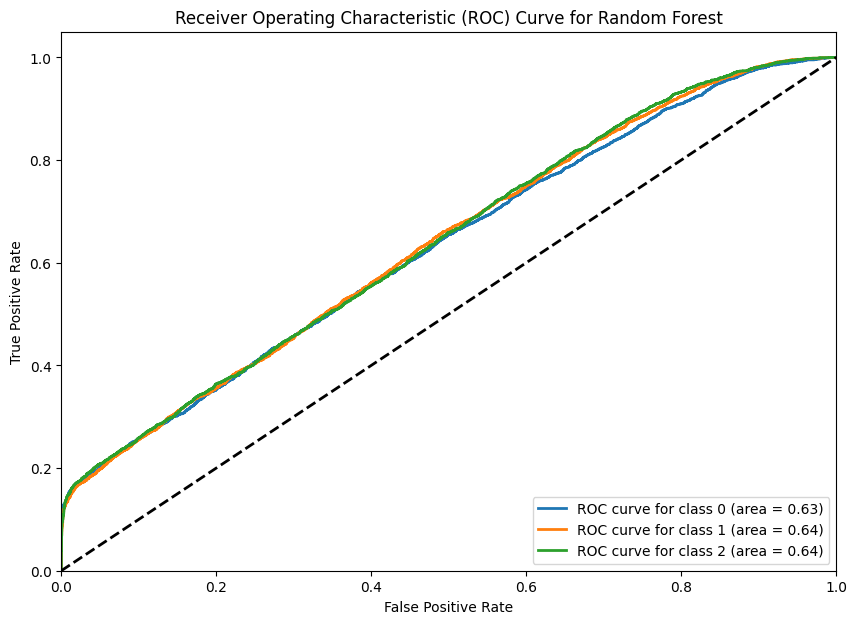


Training Decision Tree...

Model: Decision Tree
Accuracy: 0.42
Classification Report:
                           precision    recall  f1-score   support

    test_results_Abnormal       0.42      0.42      0.42      3754
test_results_Inconclusive       0.41      0.42      0.41      3617
      test_results_Normal       0.42      0.41      0.42      3729

                 accuracy                           0.42     11100
                macro avg       0.42      0.42      0.42     11100
             weighted avg       0.42      0.42      0.42     11100



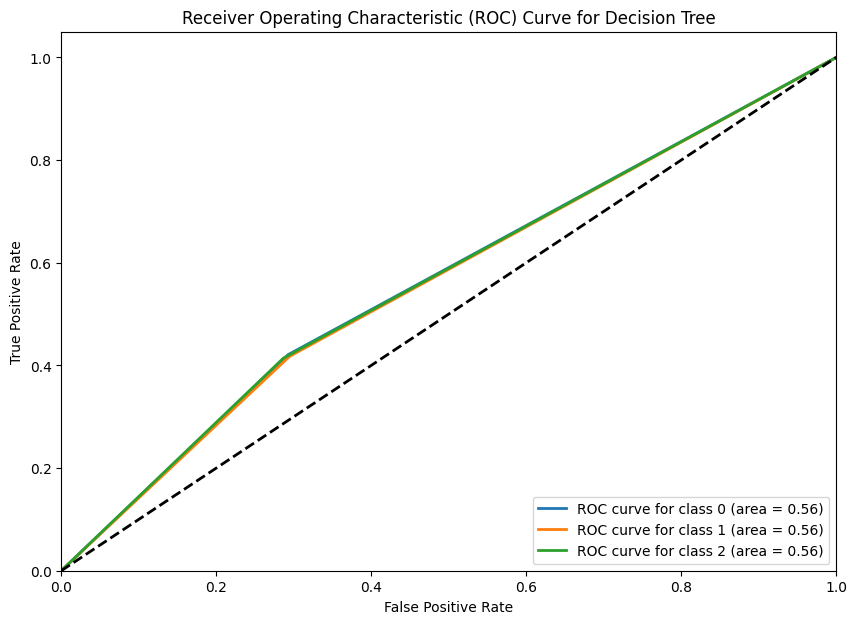


Training Logistic Regression...

Model: Logistic Regression
Accuracy: 0.34
Classification Report:
                           precision    recall  f1-score   support

    test_results_Abnormal       0.34      0.86      0.48      3754
test_results_Inconclusive       0.29      0.03      0.06      3617
      test_results_Normal       0.36      0.10      0.16      3729

                 accuracy                           0.34     11100
                macro avg       0.33      0.33      0.23     11100
             weighted avg       0.33      0.34      0.24     11100



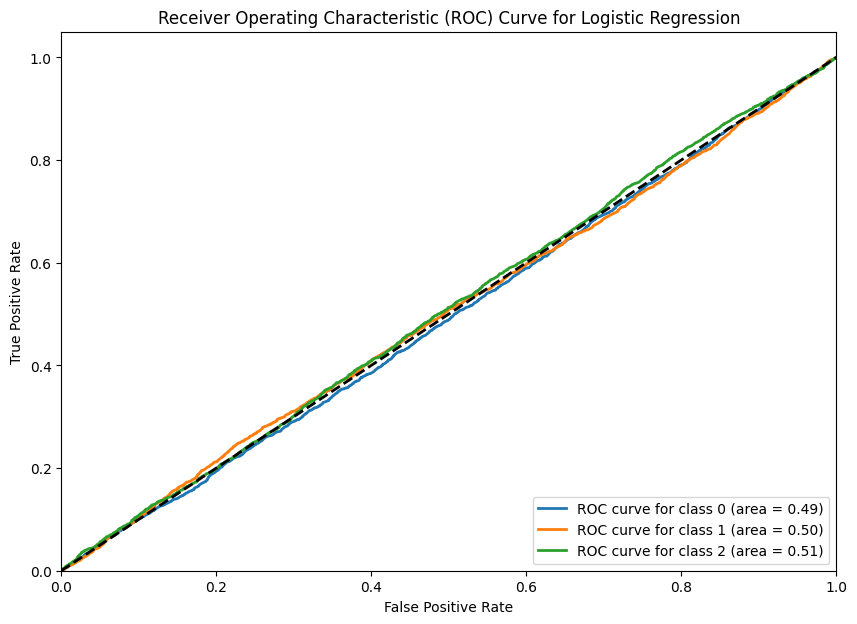


Training K-Neighbors Classifier...

Model: K-Neighbors Classifier
Accuracy: 0.44
Classification Report:
                           precision    recall  f1-score   support

    test_results_Abnormal       0.44      0.43      0.44      3754
test_results_Inconclusive       0.44      0.45      0.45      3617
      test_results_Normal       0.44      0.44      0.44      3729

                 accuracy                           0.44     11100
                macro avg       0.44      0.44      0.44     11100
             weighted avg       0.44      0.44      0.44     11100



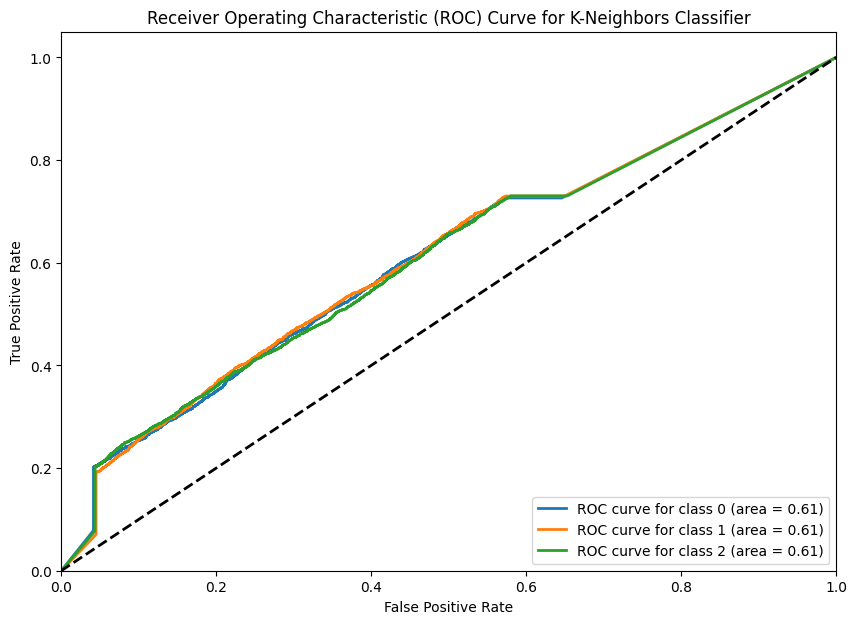


Training Gradient Boosting...

Model: Gradient Boosting
Accuracy: 0.40
Classification Report:
                           precision    recall  f1-score   support

    test_results_Abnormal       0.40      0.40      0.40      3754
test_results_Inconclusive       0.39      0.41      0.40      3617
      test_results_Normal       0.40      0.39      0.40      3729

                 accuracy                           0.40     11100
                macro avg       0.40      0.40      0.40     11100
             weighted avg       0.40      0.40      0.40     11100



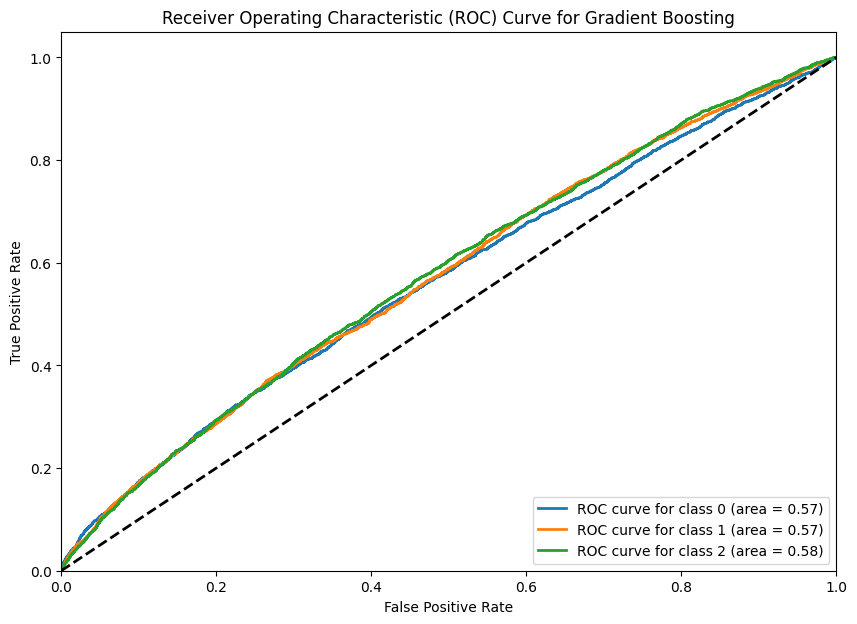


Training Naive Bayes...

Model: Naive Bayes
Accuracy: 0.34
Classification Report:
                           precision    recall  f1-score   support

    test_results_Abnormal       0.35      0.37      0.36      3754
test_results_Inconclusive       0.34      0.34      0.34      3617
      test_results_Normal       0.34      0.32      0.33      3729

                 accuracy                           0.34     11100
                macro avg       0.34      0.34      0.34     11100
             weighted avg       0.34      0.34      0.34     11100



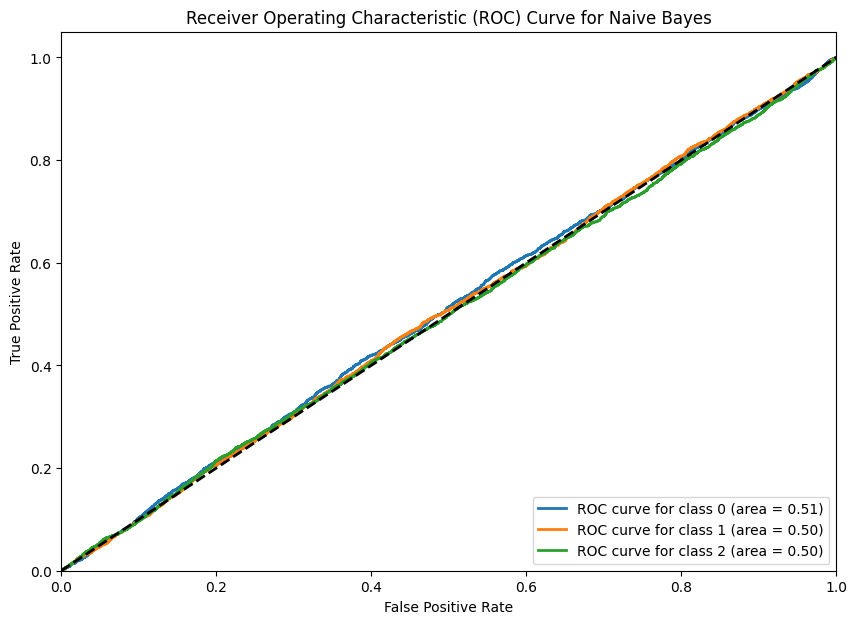

+------------------------+---------------------+--------------------------------------------------------------------+
|         Model          |      Accuracy       |                       Classification Report                        |
+------------------------+---------------------+--------------------------------------------------------------------+
|     Random Forest      | 0.43783783783783786 |              precision    recall  f1-score   support               |
|                        |                     |                                                                    |
|                        |                     |     test_results_Abnormal       0.44      0.44      0.44      3754 |
|                        |                     | test_results_Inconclusive       0.44      0.42      0.43      3617 |
|                        |                     |       test_results_Normal       0.44      0.45      0.44      3729 |
|                        |                     |        

[('Random Forest', 0.43783783783783786),
 ('Decision Tree', 0.4174774774774775),
 ('Logistic Regression', 0.3371171171171171),
 ('K-Neighbors Classifier', 0.4427027027027027),
 ('Gradient Boosting', 0.3994594594594595),
 ('Naive Bayes', 0.3428828828828829)]

In [123]:
train_multiple_classifiers(X_train, y_train, X_test, y_test,important_features.Feature.to_list())

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier


# Define hyperparameter grid for XGBoost
xgboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

# Perform GridSearchCV on XGBoost to find the best parameters
grid_search_xgboost = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgboost_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_xgboost.fit(X_train, y_train)

# Get the best parameters for XGBoost
best_xgboost_params = grid_search_xgboost.best_params_
print(f"Best parameters for XGBoost: {best_xgboost_params}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for XGBoost: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


In [31]:
# Update best parameters for XGBoost in the JSON file
best_params['XGBoost'] = best_xgboost_params
with open('best_model_params.json', 'w') as json_file:
    json.dump(best_params, json_file, indent=4)

In [32]:

# List of models to train with the best hyperparameters
models = [
    ("Random Forest", RandomForestClassifier(**best_params.get("Random Forest", {}), random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(**best_params.get("Decision Tree", {}), random_state=42)),
    ("Logistic Regression", LogisticRegression(**best_params.get("Logistic Regression", {}), random_state=42)),
    ("K-Neighbors Classifier", KNeighborsClassifier(**best_params.get("K-Neighbors Classifier", {}))),
    ("Gradient Boosting", GradientBoostingClassifier(**best_params.get("Gradient Boosting", {}), random_state=42)),
    ("XGBoost", XGBClassifier(**best_params.get("XGBoost", {}), random_state=42))
]

# Create the VotingClassifier
voting_classifier = VotingClassifier(estimators=models, voting='soft')

# Wrap VotingClassifier in OneVsRestClassifier for multilabel classification
ensemble_model = OneVsRestClassifier(voting_classifier)

# Define hyperparameters for the ensemble model
ensemble_param_grid = {
    'estimator__voting': ['hard', 'soft'],  # Voting type: hard or soft
}

# Perform GridSearchCV on the VotingClassifier
grid_search_ensemble = GridSearchCV(estimator=ensemble_model, param_grid=ensemble_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_ensemble.fit(X_train, y_train)

# Get the best parameters for the Voting Classifier
best_ensemble_params = grid_search_ensemble.best_params_
print(f"Best parameters for Voting Classifier: {best_ensemble_params}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\workspace\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [       nan 0.16175676]



Best parameters for Voting Classifier: {'estimator__voting': 'soft'}


In [33]:

# Update best parameters for Voting Classifier in the JSON file
best_params['Voting Classifier'] = best_ensemble_params
with open('best_model_params.json', 'w') as json_file:
    json.dump(best_params, json_file, indent=4)

**Step 1: Load Best Hyperparameters**

Load the best hyperparameters from a JSON file (best_model_params.json).

Step 2: Data Preparation
Convert one-hot encoded target labels (y_train, y_test) to single-class labels using .idxmax().

Map string labels (e.g., 'test_results_Abnormal') to numeric values (0, 1, 2) for compatibility with the models.

Step 3: Define Models

Define a list of models, each configured with its best hyperparameters.

Models include RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier, GradientBoostingClassifier, and XGBClassifier.

Step 4: Train and Evaluate Each Model

Loop through each model to:

Train the model on training data (X_train, y_train).

Evaluate the model using accuracy and classification metrics.

Plot the ROC curve if the model has predict_proba capability.

Step 5: Create and Train Voting Classifier

Create a VotingClassifier using all trained models.

Train the ensemble voting model on the training data (X_train, y_train).

Step 6: Evaluate the Ensemble Model

Make predictions using the voting classifier.

Evaluate its performance with accuracy and classification metrics.

Plot the ROC curve if predict_proba is available.

Step 7: Display Results

Display the results of each model and the ensemble model in a tabular format for easy comparison.

This step-by-step process involves training multiple individual models and evaluating their performance, followed by using ensemble learning to combine their strengths for potentially better results.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA


def train_multiple_classifiers(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None, learning_rate=0.1):
    # Load the best hyperparameters from JSON file
    with open('best_model_params.json', 'r') as json_file:
        best_params = json.load(json_file)
    print(best_params)

    # Convert multilabel y_train and y_test to multiclass by selecting the label with the maximum value
    if isinstance(y_train, pd.DataFrame) or isinstance(y_test, pd.DataFrame):
        y_train = y_train.idxmax(axis=1)
        y_test = y_test.idxmax(axis=1)

    # Ensure y_train and y_test have integer labels instead of strings
    label_mapping = {'test_results_Abnormal': 0, 'test_results_Inconclusive': 1, 'test_results_Normal': 2}
    y_train = y_train.map(label_mapping)
    y_test = y_test.map(label_mapping)

    # List of models to train with the best hyperparameters
    models = [
        ("Random Forest", RandomForestClassifier(**best_params.get("Random Forest", {}), random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(**best_params.get("Decision Tree", {}), random_state=42)),
        ("Logistic Regression", LogisticRegression(**best_params.get("Logistic Regression", {}), random_state=42)),
        ("K-Neighbors Classifier", KNeighborsClassifier(**best_params.get("K-Neighbors Classifier", {}))),
        ("Gradient Boosting", GradientBoostingClassifier(**best_params.get("Gradient Boosting", {}), random_state=42)),
        ("XGBoost", XGBClassifier(**best_params.get("XGBoost", {}), random_state=42, num_class=3))
    ]
    results = []
    metrics = []
    
    # Iterate over each model, train, and evaluate
    for model_name, model in models:
        print(f"\nTraining {model_name}...")

        model.fit(X_train, y_train)
        accuracy, report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
        metrics.append((model_name, accuracy, report))
        results.append((model_name, accuracy))

        # Print the results
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Classification Report:\n{report}")

        # Plot ROC curve for the model
        if hasattr(model, "predict_proba"):
            y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
            y_pred_proba = model.predict_proba(X_test)

            n_classes = y_test_binarized.shape[1]

            plt.figure(figsize=(10, 7))
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], 'k--', lw=2)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
            plt.legend(loc='lower right')
            plt.show()
        else:
            print(f"Skipping ROC curve for {model_name} as predict_proba is not available.")

    # Create the VotingClassifier for ensemble learning
    voting_classifier = VotingClassifier(estimators=models, voting=best_params.get('Voting Classifier', {}).get('estimator__voting', 'soft'))
    
    # Train the ensemble model
    print("\nTraining Ensemble Model...")
    voting_classifier.fit(X_train, y_train)
    y_pred = voting_classifier.predict(X_test)

    # Evaluate the ensemble model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    metrics.append(("Ensemble Model", accuracy, report))

    print(f"\nEnsemble Model Accuracy: {accuracy:.2f}")
    print(f"Classification Report for Ensemble Model:\n{report}")

    # Plot ROC curve for the ensemble model
    if hasattr(voting_classifier, "predict_proba"):
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
        y_pred_proba = voting_classifier.predict_proba(X_test)

        n_classes = y_test_binarized.shape[1]

        plt.figure(figsize=(10, 7))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve for Ensemble Model')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print("Skipping ROC curve for Ensemble Model as predict_proba is not available.")

    # Display results in a tabular format
    from tabulate import tabulate
    print(tabulate(metrics, headers=["Model", "Accuracy", "Classification Report"], tablefmt="pretty", floatfmt=".4f"))

    return results


{'Random Forest': {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}, 'Decision Tree': {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}, 'Logistic Regression': {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}, 'K-Neighbors Classifier': {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}, 'Gradient Boosting': {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}, 'XGBoost': {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}, 'Voting Classifier': {'estimator__voting': 'soft'}}

Training Random Forest...

Model: Random Forest
Accuracy: 0.44
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44      3754
           1       0.44      0.42      0.43      3617
           2       0.44      0.45      0.44      3729

    a

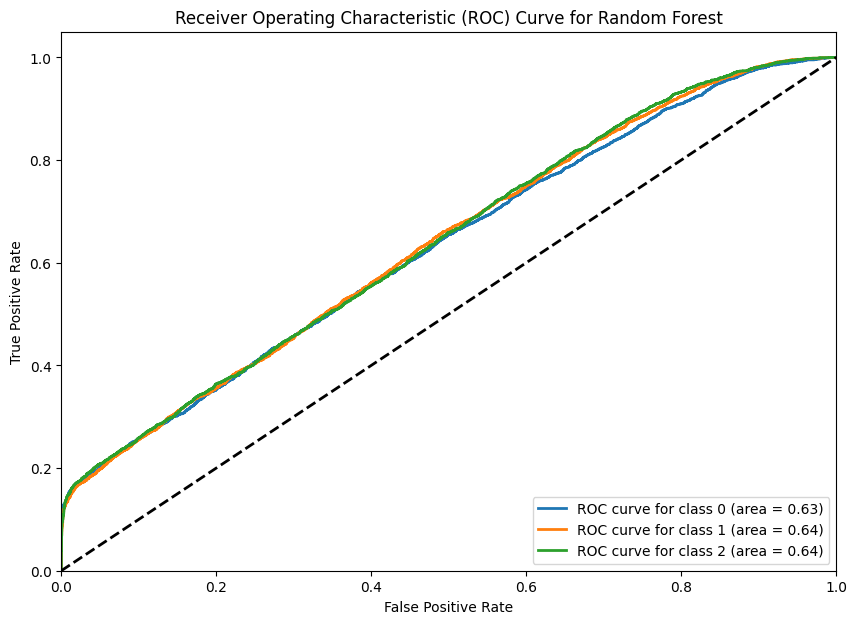


Training Decision Tree...

Model: Decision Tree
Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42      3754
           1       0.41      0.42      0.41      3617
           2       0.42      0.41      0.42      3729

    accuracy                           0.42     11100
   macro avg       0.42      0.42      0.42     11100
weighted avg       0.42      0.42      0.42     11100



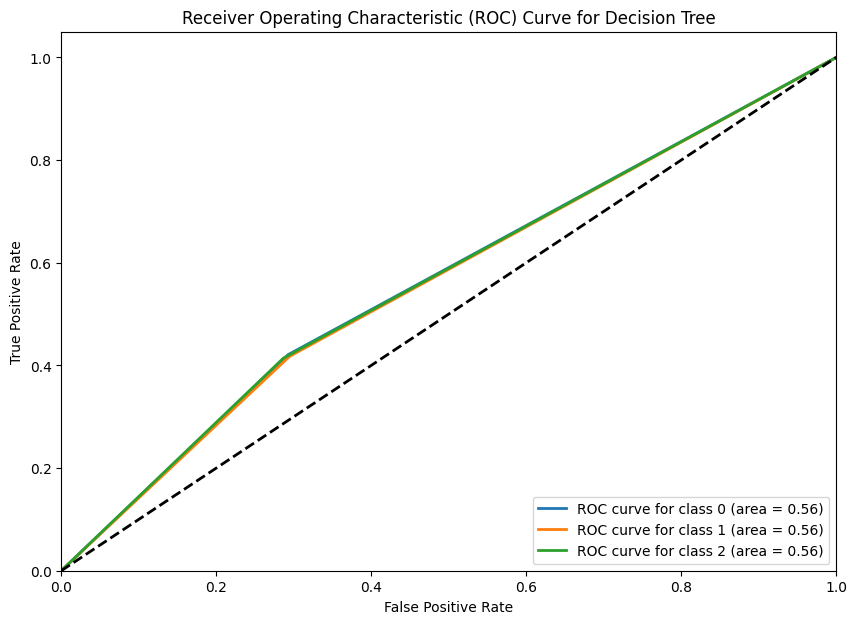


Training Logistic Regression...

Model: Logistic Regression
Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.86      0.48      3754
           1       0.29      0.03      0.06      3617
           2       0.36      0.10      0.16      3729

    accuracy                           0.34     11100
   macro avg       0.33      0.33      0.23     11100
weighted avg       0.33      0.34      0.24     11100



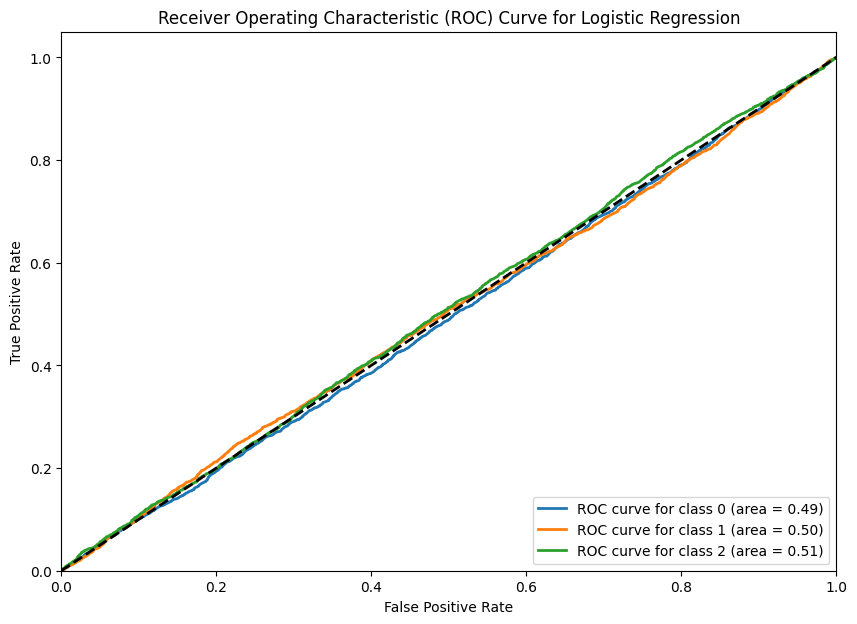


Training K-Neighbors Classifier...

Model: K-Neighbors Classifier
Accuracy: 0.44
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.43      0.44      3754
           1       0.44      0.45      0.45      3617
           2       0.44      0.44      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



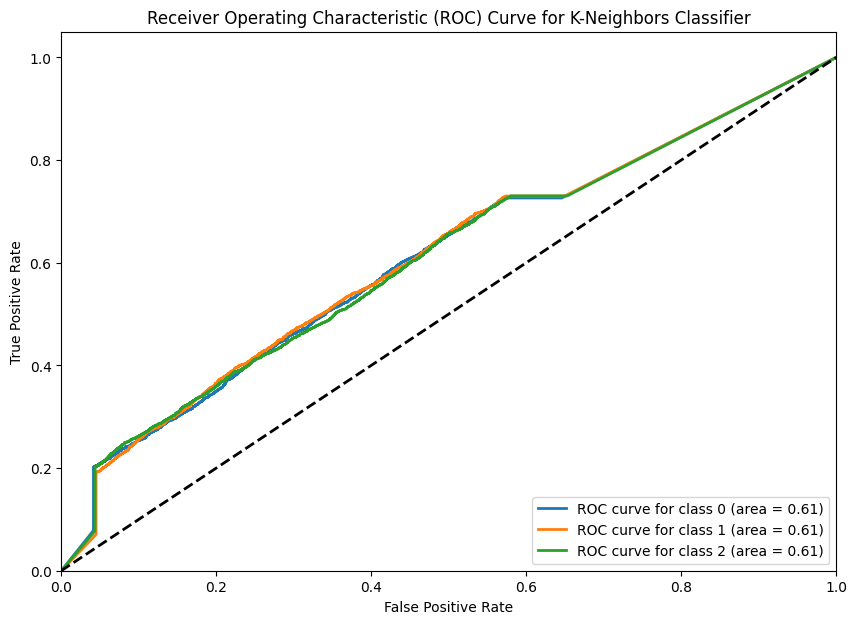


Training Gradient Boosting...

Model: Gradient Boosting
Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      3754
           1       0.39      0.41      0.40      3617
           2       0.40      0.39      0.40      3729

    accuracy                           0.40     11100
   macro avg       0.40      0.40      0.40     11100
weighted avg       0.40      0.40      0.40     11100



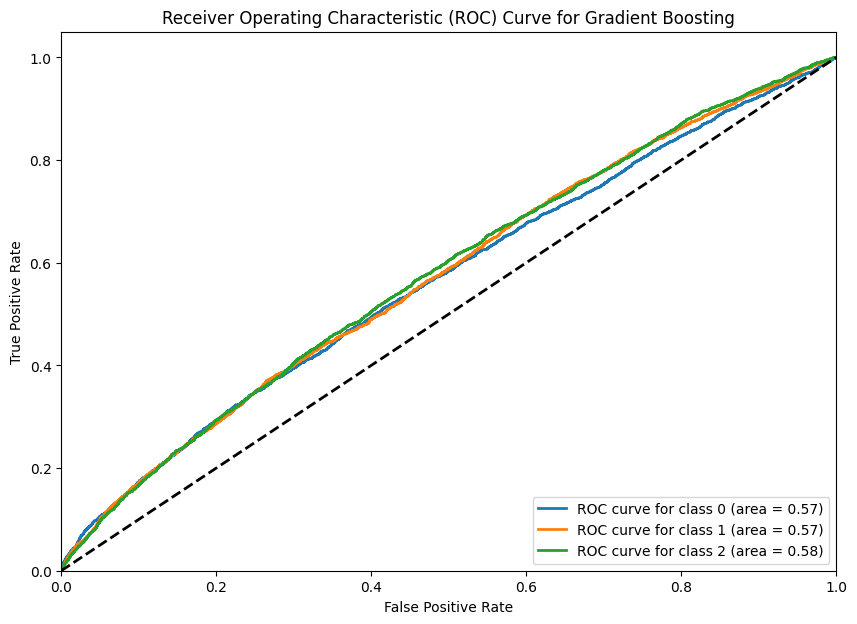


Training XGBoost...

Model: XGBoost
Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      3754
           1       0.40      0.40      0.40      3617
           2       0.40      0.40      0.40      3729

    accuracy                           0.40     11100
   macro avg       0.40      0.40      0.40     11100
weighted avg       0.40      0.40      0.40     11100



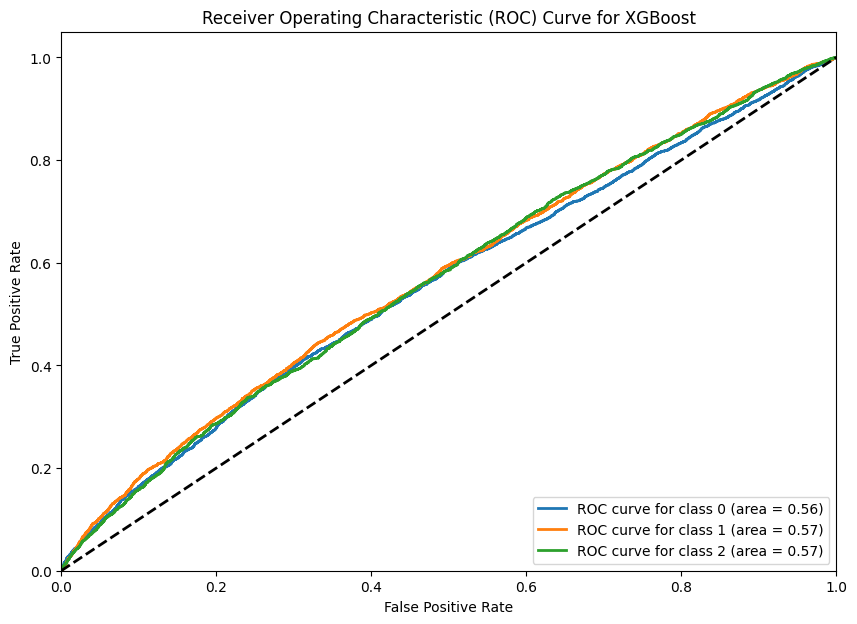


Training Ensemble Model...

Ensemble Model Accuracy: 0.44
Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.45      0.44      0.44      3754
           1       0.42      0.43      0.43      3617
           2       0.44      0.44      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



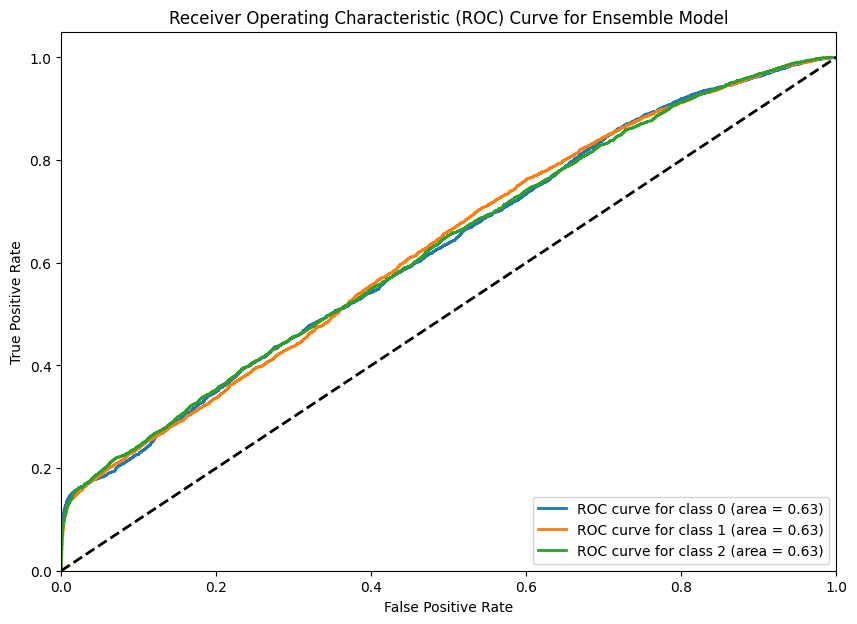

+------------------------+---------------------+-------------------------------------------------------+
|         Model          |      Accuracy       |                 Classification Report                 |
+------------------------+---------------------+-------------------------------------------------------+
|     Random Forest      | 0.43783783783783786 |        precision    recall  f1-score   support        |
|                        |                     |                                                       |
|                        |                     |            0       0.44      0.44      0.44      3754 |
|                        |                     |            1       0.44      0.42      0.43      3617 |
|                        |                     |            2       0.44      0.45      0.44      3729 |
|                        |                     |                                                       |
|                        |                     |     ac

[('Random Forest', 0.43783783783783786),
 ('Decision Tree', 0.4174774774774775),
 ('Logistic Regression', 0.3371171171171171),
 ('K-Neighbors Classifier', 0.4427027027027027),
 ('Gradient Boosting', 0.3994594594594595),
 ('XGBoost', 0.39963963963963967)]

In [46]:
train_multiple_classifiers(X_train, y_train, X_test, y_test,important_features.Feature.to_list())

In [ ]:
X_train.to_csv()

age  billing_amount  room_number  gender_Female  gender_Male  \
45174  0.118421        0.808927     0.588972              1            0   
10214  0.118421        0.081170     0.964912              0            1   
43199  0.894737        0.138918     0.729323              1            0   
31626  0.881579        0.758439     0.310777              1            0   
9273   0.171053        0.724807     0.446115              1            0   
...         ...             ...          ...            ...          ...   
44732  0.184211        0.547976     0.644110              1            0   
54343  0.250000        0.080150     0.280702              0            1   
38158  0.144737        0.228420     0.799499              1            0   
860    0.828947        0.274275     0.017544              0            1   
15795  0.263158        0.611471     0.506266              1            0   

       blood_type_A+  blood_type_A-  blood_type_AB+  blood_type_AB-  \
45174              0              0               0               0   
10214              0              0               0               0   
43199              1              0               0               0   
31626              0              0               0               0   
9273               0              0               1               0   
...              ...            ...             ...             ...   
44732              0              0               0               0   
54343              0              0               0               1   
38158              0              0               0               0   
860                1              0               0               0   
15795              0              0               0               0   

       blood_type_B+  ...  admission_type_Emergency  admission_type_Urgent  \
45174              0  ...                         0                      0   
10214              0  ...                         1                      0   
43199              0  ...                         1                      0   
31626              1  ...                         0                      0   
9273               0  ...                         0                      0   
...              ...  ...                       ...                    ...   
44732              0  ...                         0                      0   
54343              0  ...                         1                      0   
38158              0  ...                         1                      0   
860                0  ...                         1                      0   
15795              1  ...                         0                      1   

       medication_Aspirin  medication_Ibuprofen  medication_Lipitor  \
45174                   0                     1                   0   
10214                   0                     0                   0   
43199                   0                     0                   0   
31626                   0                     0                   0   
9273                    0                     1                   0   
...                   ...                   ...                 ...   
44732                   0                     0                   0   
54343                   0                     0                   0   
38158                   0                     0                   1   
860                     1                     0                   0   
15795                   0                     0                   1   

       medication_Paracetamol  medication_Penicillin  length_of_stay  \
45174                       0                      0              21   
10214                       1                      0              22   
43199                       1                      0              21   
31626                       1                      0              13   
9273                        0                      0              27   
...                     